<a href="https://colab.research.google.com/github/ParishaKB/Hackathons/blob/main/job-a-thon/EDA_and_baseline_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Improvements 

Age Bins 

Chi-square tests for categorical variables wrt correlation with response 

Finding better ways to manage ages and health indicators 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Job-a-thon/train_Df64byy.csv')
test = pd.read_csv('/content/drive/MyDrive/Job-a-thon/test_YCcRUnU.csv')

In [ ]:
print(train.shape,test.shape)

(50882, 14) (21805, 13)


## EDA

In [ ]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

Two types of accomodation 
>rented and owned 

Two types of Recommended insurance  
>individual and joint

Upper Age and Lower Age (only for joint)
>Incase of joint they are different else same 

If the customers are married to each other 
>Yes or no (only for joint)

Health Indicator   
>lot of null, 9 categories 

Holding_Policy_Duration  
>15 categories (1,2,3,..14,14+ years), lot of null
> null maybe because they have no holding policy 

Holding_Policy_Type 
>should be categorical,datatype error
> null maybe because they have no holding policy

Reco_Policy_Cat
> 22 categories

Reco_Policy_Premium
>integer amount 

Response 
>very imbalanced 

In [ ]:
for col in train:
    print(col,train[col].nunique())

ID 50882
City_Code 36
Region_Code 5316
Accomodation_Type 2
Reco_Insurance_Type 2
Upper_Age 58
Lower_Age 60
Is_Spouse 2
Health Indicator 9
Holding_Policy_Duration 15
Holding_Policy_Type 4
Reco_Policy_Cat 22
Reco_Policy_Premium 6977
Response 2


In [ ]:
val_count = ['Accomodation_Type','Reco_Insurance_Type','Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Response']

In [ ]:
for col in val_count:
    print(col,'\n',train[col].value_counts(),'\n')

Accomodation_Type 
 Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64 

Reco_Insurance_Type 
 Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64 

Is_Spouse 
 No     42460
Yes     8422
Name: Is_Spouse, dtype: int64 

Health Indicator 
 X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64 

Holding_Policy_Duration 
 1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64 

Holding_Policy_Type 
 3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64 

Reco_Policy_Cat 
 22    6602
18    5553
21    5027
16    4084
17    3756
19    3708
20    3177
12    2168
1     1967
2     1917
14    1742
13    1684
15    1615
3     1059
4     1015
5 

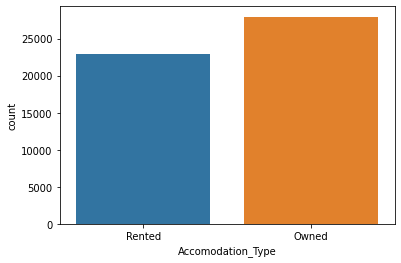

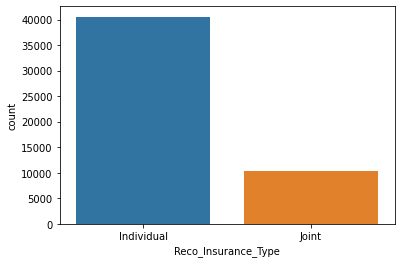

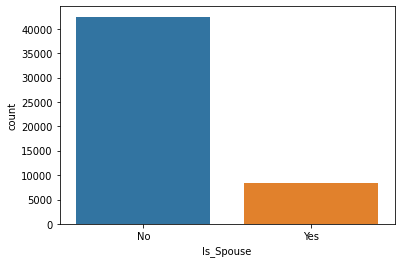

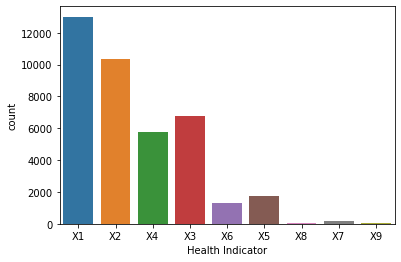

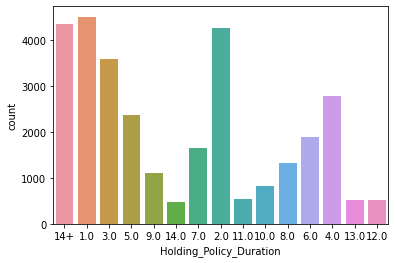

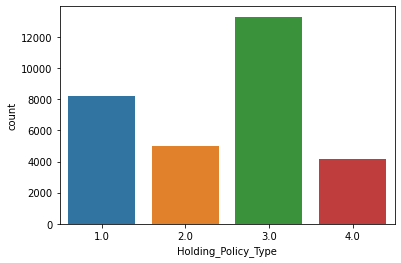

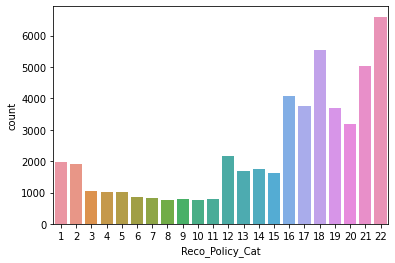

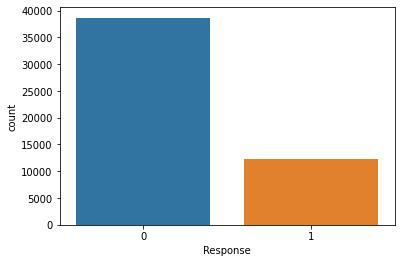

In [ ]:
for col in val_count :
  plt.figure() #this creates a new figure on which your plot will appear
  sns.countplot(x=col,data=train)

In [ ]:
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

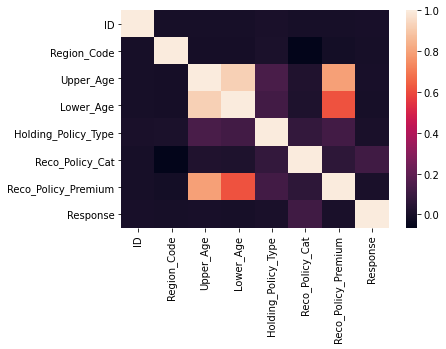

In [ ]:
dataplot=sns.heatmap(train.corr()) 
plt.show()

In [ ]:
train_policy = train[train['Holding_Policy_Type'].isin([1.0, 2.0, 3.0, 4.0])]

In [ ]:
train_policy.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1


In [ ]:
train_no_policy = train[train['Holding_Policy_Duration'].isna()]
train_no_policy.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0
10,11,C28,600,Owned,Individual,21,21,No,X2,NaN,NaN,21,4068.0,1
13,14,C5,900,Rented,Individual,20,20,No,X2,NaN,NaN,18,8364.0,0
15,16,C3,1484,Rented,Individual,20,20,No,X3,NaN,NaN,2,4912.0,0


In [ ]:
print(train.shape,train_policy.shape,train_no_policy.shape)

(50882, 14) (30631, 14) (20251, 14)


Data has been divided into two sets based on policy no policy

In [ ]:
print('Response','\n',train_policy['Response'].value_counts()/len(train_policy)*100,'\n')

Response 
 0    75.939408
1    24.060592
Name: Response, dtype: float64 



In [ ]:
print('Response','\n',train_no_policy['Response'].value_counts()/len(train_no_policy)*100,'\n')

Response 
 0    76.104884
1    23.895116
Name: Response, dtype: float64 



In [ ]:
train_health = train[train['Health Indicator'].isin(['X1','X2','X3','X3','X4','X5','X6','X7','X8','X9'])]
train_no_health = train[train['Health Indicator'].isna()]

In [ ]:
train_health.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1


In [ ]:
train_no_health.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1
12,13,C7,3453,Owned,Individual,66,66,No,NaN,1.0,2.0,20,17192.0,1
19,20,C20,973,Owned,Individual,27,27,No,NaN,NaN,NaN,4,8050.0,0


In [ ]:
print(train.shape,train_health.shape,train_no_health.shape)

(50882, 14) (39191, 14) (11691, 14)


In [ ]:
print('Response','\n',train_health['Response'].value_counts()/len(train_health)*100,'\n')
print('Response','\n',train_no_health['Response'].value_counts()/len(train_no_health)*100,'\n')

Response 
 0    75.833737
1    24.166263
Name: Response, dtype: float64 

Response 
 0    76.580275
1    23.419725
Name: Response, dtype: float64 



Two types of accomodation 
>rented and owned 

Two types of Recommended insurance  
>individual and joint

Upper Age and Lower Age (only for joint)
>Incase of joint they are different else same 

If the customers are married to each other 
>Yes or no (only for joint)

Health Indicator   
>lot of null, 9 categories 

Holding_Policy_Duration  
>15 categories (1,2,3,..14,14+ years), lot of null
> null maybe because they have no holding policy 

Holding_Policy_Type 
>should be categorical,datatype error
> null maybe because they have no holding policy

Reco_Policy_Cat
> 22 categories

Reco_Policy_Premium
>integer amount 

Response 
>very imbalanced 

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

Replacing na with 0 for policy

In [ ]:
train['Holding_Policy_Duration'].fillna(0, inplace=True)
train['Holding_Policy_Type'].fillna(0, inplace=True)

In [ ]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,0,0.0,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [ ]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [ ]:
train.isnull().sum(axis = 0)/len(train)*100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration     0.000000
Holding_Policy_Type         0.000000
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

Replacing na for health indicator 

In [ ]:
def draw_boxplot_numerical_categorical_cols(df, numerical_col, categorical_col):
    categories = []
    for category in df[categorical_col].unique():
        categories.append({
                'categorical_col': category,
                'numerical_col': df[df[categorical_col] == category][numerical_col]})
        
    
    plt.figure(figsize=(10, 8))
    plt.boxplot([e['numerical_col'] for e in categories], labels=[e['categorical_col'] for e in categories]);
# draw_boxplot_numerical_categorical_cols(train_health,'Lower_Age','Health Indicator')

In [ ]:
# X1 = train.loc[train['Health Indicator'] == 'X1']
# X2 = train.loc[train['Health Indicator'] == 'X2']
# X3 = train.loc[train['Health Indicator'] == 'X3']
# X4 = train.loc[train['Health Indicator'] == 'X4']
# X5 = train.loc[train['Health Indicator'] == 'X5']
# X6 = train.loc[train['Health Indicator'] == 'X6']
# X7 = train.loc[train['Health Indicator'] == 'X7']
# X8 = train.loc[train['Health Indicator'] == 'X8']
# X9 = train.loc[train['Health Indicator'] == 'X9']
# X1.describe()
# X2.describe()
# X3.describe()

In [ ]:
train.isnull().sum(axis = 0)/len(train)*100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration     0.000000
Holding_Policy_Type         0.000000
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [ ]:
train = train.fillna(train.groupby(['Lower_Age']).transform(pd.Series.mode))
train.isnull().sum(axis = 0)/len(train)*100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.953107
Holding_Policy_Duration     0.000000
Holding_Policy_Type         0.000000
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [ ]:
train = train.fillna(train.groupby(['Upper_Age']).transform(pd.Series.mode))
train.isnull().sum(axis = 0)/len(train)*100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.949177
Holding_Policy_Duration     0.000000
Holding_Policy_Type         0.000000
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [ ]:
train.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,1.468417,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.434988,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,0.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,0.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,1.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


Check if different age then whats health indicator 

In [ ]:
# bins = [18, 30, 40, 50, 60, 70, 120]
# labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
# ages['agerange'] = pd.cut(ages.age, bins, labels = labels,include_lowest = True)

In [ ]:
train['Health Indicator'] = train['Health Indicator'].fillna(train['Health Indicator'].mode()[0])
train.isnull().sum(axis = 0)/len(train)*100

ID                         0.0
City_Code                  0.0
Region_Code                0.0
Accomodation_Type          0.0
Reco_Insurance_Type        0.0
Upper_Age                  0.0
Lower_Age                  0.0
Is_Spouse                  0.0
Health Indicator           0.0
Holding_Policy_Duration    0.0
Holding_Policy_Type        0.0
Reco_Policy_Cat            0.0
Reco_Policy_Premium        0.0
Response                   0.0
dtype: float64

Test data function 

In [ ]:
test['Holding_Policy_Duration'].fillna(0, inplace=True)
test['Holding_Policy_Type'].fillna(0, inplace=True)

In [ ]:
test['Health Indicator'] = test['Health Indicator'].fillna(test['Health Indicator'].mode()[0])
# test.isnull().sum(axis = 0)/len(test)*100

In [ ]:
train['Holding_Policy_Duration'].unique()
train['Holding_Policy_Duration'] = train['Holding_Policy_Duration'].astype(str)
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,0,0.0,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [ ]:
label_encoder = preprocessing.LabelEncoder() 
train['City_Code']= label_encoder.fit_transform(train['City_Code']) 
train['Accomodation_Type']= label_encoder.fit_transform(train['Accomodation_Type']) 
train['Reco_Insurance_Type']= label_encoder.fit_transform(train['Reco_Insurance_Type']) 
train['Is_Spouse']= label_encoder.fit_transform(train['Is_Spouse']) 
train['Health Indicator']= label_encoder.fit_transform(train['Health Indicator']) 
train['Holding_Policy_Duration']= label_encoder.fit_transform(train['Holding_Policy_Duration']) 
train['Response']= label_encoder.fit_transform(train['Response']) 

In [ ]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,22,3213,1,0,36,36,0,0,6,3.0,22,11628.0,0
1,2,31,1117,0,1,75,22,0,1,0,0.0,22,30510.0,0
2,3,31,3732,0,0,32,32,0,0,1,1.0,19,7450.0,1
3,4,16,4378,0,1,52,48,0,0,6,3.0,19,17780.0,0
4,5,34,2190,1,0,44,44,0,1,9,1.0,16,10404.0,0


In [ ]:
test['Holding_Policy_Duration'] = test['Holding_Policy_Duration'].astype(str)
test['City_Code']= label_encoder.fit_transform(test['City_Code']) 
test['Accomodation_Type']= label_encoder.fit_transform(test['Accomodation_Type']) 
test['Reco_Insurance_Type']= label_encoder.fit_transform(test['Reco_Insurance_Type']) 
test['Is_Spouse']= label_encoder.fit_transform(test['Is_Spouse']) 
test['Health Indicator']= label_encoder.fit_transform(test['Health Indicator']) 
test['Holding_Policy_Duration']= label_encoder.fit_transform(test['Holding_Policy_Duration']) 

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  int64  
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  int64  
 4   Reco_Insurance_Type      50882 non-null  int64  
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  int64  
 8   Health Indicator         50882 non-null  int64  
 9   Holding_Policy_Duration  50882 non-null  int64  
 10  Holding_Policy_Type      50882 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(1

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  int64  
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  int64  
 4   Reco_Insurance_Type      21805 non-null  int64  
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  int64  
 8   Health Indicator         21805 non-null  int64  
 9   Holding_Policy_Duration  21805 non-null  int64  
 10  Holding_Policy_Type      21805 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 2.2 MB


## Sampling 

In [ ]:
x = train.drop(['ID','Health Indicator','Response'],axis = 1)
y = train['Response']
test = test.drop(['ID','Health Indicator'],axis = 1)

Under Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', x_rus.shape)
print('Resample dataset shape', x.shape)

original dataset shape: (24418, 12)
Resample dataset shape (50882, 12)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Random Over Sampling ( Reduced RF Accuracy )

In [ ]:
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(random_state=42)
# x_ros, y_ros = ros.fit_resample(x, y)
# print('original dataset shape:', x_ros.shape)
# print('Resample dataset shape', x.shape)

## Testing models 

In [ ]:
x,y = x_rus,y_rus

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb 
import xgboost as xgb
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = True, test_size = 0.2)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)
print(x.shape)

(19534, 12) (4884, 12)
(19534,) (4884,)
(50882, 14)


In [ ]:
print('Multinomial Naive Bayes')
ab = MultinomialNB()
ab.fit(x_train,y_train)
yprednb = ab.predict(x_test)
print(roc_auc_score(y_test,yprednb),'\n')

print('Linear Support Vector Classification')
svc = LinearSVC().fit(x_train,y_train)
y_predsvc = svc.predict(x_test)
print(roc_auc_score(y_test,y_predsvc),'\n')

print('Random Forest Classifier')
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_predrf=clf.predict(x_test)
print(roc_auc_score(y_test,y_predrf),'\n')

print('Gradient Boosting Classifier')
model = GradientBoostingClassifier()
model.fit(x_train, y_train)
ypredgbc = model.predict(x_test)
print(roc_auc_score(y_test,ypredgbc),'\n')

from xgboost import XGBClassifier
print('XGB Classifier')
model = XGBClassifier()
model.fit(x_train, y_train)
ypredxgb = model.predict(x_test)
print(roc_auc_score(y_test,ypredxgb),'\n')

from lightgbm import LGBMClassifier
print('LGBM Classifier')
model = LGBMClassifier()
model.fit(x_train, y_train)
ypredlgbm = model.predict(x_test)
print(roc_auc_score(y_test,ypredlgbm),'\n')

Multinomial Naive Bayes
0.4859085607631479 

Linear Support Vector Classification


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5 

Random Forest Classifier
0.6194521561008821 

Gradient Boosting Classifier
0.5787478859906476 

XGB Classifier
0.5722807152876939 

LGBM Classifier
0.6163523077813151 



In [ ]:
y_predrf=clf.predict(test)

## Neural Network

In [ ]:
from keras import models
from keras import layers
nn=models.Sequential()

In [ ]:
nn.add(layers.Dense(1024,activation = "relu",input_shape=(12,))) 
nn.add(layers.Dense(512,activation='relu'))
nn.add(layers.Dense(256,activation='relu'))
nn.add(layers.Dense(128,activation='relu'))
nn.add(layers.Dense(1,activation='sigmoid'))
nn.summary()

In [ ]:
nn.compile(optimizer='rmsprop',
           loss='binary_crossentropy',
           metrics=['accuracy'])

In [ ]:
nn.fit(x_train,y_train,epochs=100,batch_size=100)

In [ ]:
y_prednn = nn.predict(x_test)
print(roc_auc_score(y_test,y_prednn))